## Importar bibliotecas

In [69]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Cargando los datos

In [70]:
# Cargar el conjunto de datos
lastfm_data = pd.read_csv("data/lastfm1.csv", sep=";")
lastfm_data

,user,artist
0,1,red hot chili peppers
1,1,the black dahlia murder
2,1,goldfrapp
3,1,dropkick murphys
4,1,le tigre
...,...,...
289948,19718,bob dylan
289949,19718,pixies
289950,19718,the clash
289951,19718,a tribe called quest


## Formato de transacción

In [71]:
transacciones = lastfm_data.groupby("user")["artist"].apply(list).reset_index()
transacciones["artist"] = transacciones["artist"].apply(lambda x: ','.join(x))
transacciones

,user,artist
0,1,"red hot chili peppers,the black dahlia murder,..."
1,3,"devendra banhart,boards of canada,cocorosie,ap..."
2,4,"tv on the radio,tool,kyuss,dj shadow,air,a tri..."
3,5,"dream theater,ac/dc,metallica,iron maiden,bob ..."
4,6,"lily allen,kanye west,sigur rós,pink floyd,ste..."
...,...,...
14995,19713,"armin van buuren,above & beyond,atb,ferry cors..."
14996,19714,"misfits,type o negative,arch enemy,red hot chi..."
14997,19715,"abba,james blunt,jason mraz,amy winehouse,quee..."
14998,19717,"marilyn manson,beyoncé,madonna,t.a.t.u.,katy p..."


## Graficar los artistas mas consumidos

In [72]:
import matplotlib.pyplot as plt

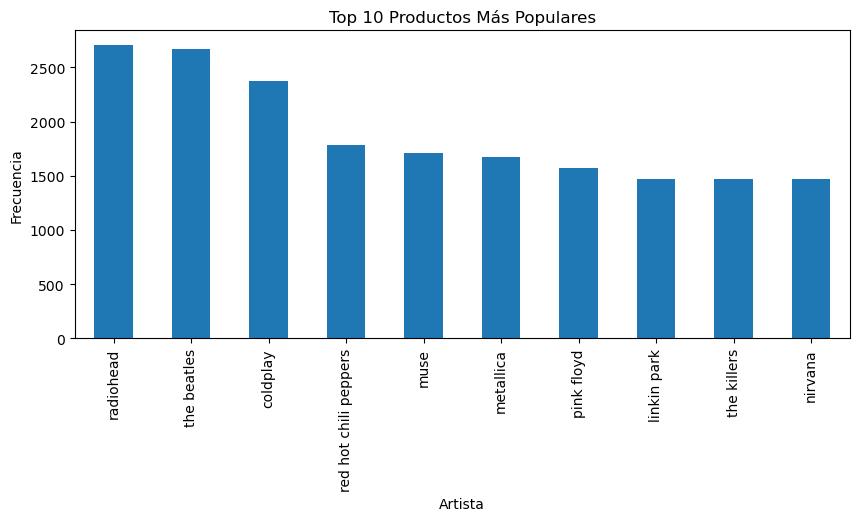

In [73]:
# Dividir las cadenas de productos y expandirlas en nuevas columnas
productos_divididos = transacciones['artist'].str.split(',', expand=True)

# Apilar las columnas para obtener una sola columna de productos
productos_apilados = productos_divididos.stack()

# Contar la frecuencia de cada producto
productos_contados = productos_apilados.value_counts()

# Mostrar los 10 productos más populares
plt.figure(figsize=(10, 4))

productos_contados.head(10).plot(kind='bar')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.title('Top 10 Productos Más Populares')
plt.show()

## Reglas de asociación por medio del algoritmo apriori

In [74]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [75]:
# Crear un codificador one-hot
te = TransactionEncoder()
transacciones_encoded = te.fit(transacciones["artist"].apply(lambda x: x.split(','))).transform(transacciones["artist"].apply(lambda x: x.split(',')))

In [76]:
transacciones_encoded_df = pd.DataFrame(transacciones_encoded, columns=te.columns_)
transacciones_encoded_df

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
# Obtenemos las reglas de asociación por medio del algoritmo apriori
frequent_artist = apriori(transacciones_encoded_df, min_support=0.01, use_colnames=True)
frequent_artist

,support,itemsets
0,0.022733,(2pac)
1,0.030933,(3 doors down)
2,0.032800,(30 seconds to mars)
3,0.021800,(50 cent)
4,0.013667,(65daysofstatic)
...,...,...
1684,0.010600,"(the beatles, the rolling stones, radiohead)"
1685,0.010667,"(the beatles, radiohead, the shins)"
1686,0.011467,"(the smashing pumpkins, the beatles, radiohead)"
1687,0.010467,"(the strokes, the beatles, radiohead)"


In [101]:
# Generamos reglas de asociación
reglas = association_rules(frequent_artist, metric="confidence", min_threshold=0.55)
reglas = reglas.sort_values(by="confidence", ascending=False)
reglas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(the killers, oasis)",(coldplay),0.016800,0.158533,0.011133,0.662698,4.180183,0.008470,2.494701,0.773775
19,"(sigur rós, the beatles)",(radiohead),0.016267,0.180267,0.010467,0.643443,3.569393,0.007534,2.299022,0.731743
0,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676,0.778478
12,"(radiohead, snow patrol)",(coldplay),0.015867,0.158533,0.010067,0.634454,4.002021,0.007551,2.301943,0.762220
13,"(the smashing pumpkins, coldplay)",(radiohead),0.017400,0.180267,0.010933,0.628352,3.485683,0.007797,2.205674,0.725740
22,"(the smashing pumpkins, the beatles)",(radiohead),0.018467,0.180267,0.011467,0.620939,3.444556,0.008138,2.162535,0.723039
5,"(pink floyd, bob dylan)",(the beatles),0.016800,0.177867,0.010333,0.615079,3.458092,0.007345,2.135852,0.722969
17,"(the doors, led zeppelin)",(pink floyd),0.017867,0.104933,0.010667,0.597015,5.689469,0.008792,2.221091,0.839231
14,"(the killers, snow patrol)",(coldplay),0.017467,0.158533,0.010400,0.595420,3.755802,0.007631,2.079852,0.746789
7,"(bob dylan, the rolling stones)",(the beatles),0.019400,0.177867,0.011467,0.591065,3.323081,0.008016,2.010427,0.712905


In [102]:
# Verificamos si hay reglas redundantes
redundantes = reglas.duplicated(subset=['antecedents', 'consequents'])
print(redundantes)

10    False
19    False
0     False
12    False
13    False
22    False
5     False
17    False
14    False
7     False
4     False
8     False
9     False
11    False
3     False
18    False
15    False
6     False
16    False
21    False
2     False
20    False
1     False
23    False
dtype: bool


In [103]:
reglas_podadas = reglas[~redundantes]
reglas_podadas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(the killers, oasis)",(coldplay),0.016800,0.158533,0.011133,0.662698,4.180183,0.008470,2.494701,0.773775
19,"(sigur rós, the beatles)",(radiohead),0.016267,0.180267,0.010467,0.643443,3.569393,0.007534,2.299022,0.731743
0,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676,0.778478
12,"(radiohead, snow patrol)",(coldplay),0.015867,0.158533,0.010067,0.634454,4.002021,0.007551,2.301943,0.762220
13,"(the smashing pumpkins, coldplay)",(radiohead),0.017400,0.180267,0.010933,0.628352,3.485683,0.007797,2.205674,0.725740
22,"(the smashing pumpkins, the beatles)",(radiohead),0.018467,0.180267,0.011467,0.620939,3.444556,0.008138,2.162535,0.723039
5,"(pink floyd, bob dylan)",(the beatles),0.016800,0.177867,0.010333,0.615079,3.458092,0.007345,2.135852,0.722969
17,"(the doors, led zeppelin)",(pink floyd),0.017867,0.104933,0.010667,0.597015,5.689469,0.008792,2.221091,0.839231
14,"(the killers, snow patrol)",(coldplay),0.017467,0.158533,0.010400,0.595420,3.755802,0.007631,2.079852,0.746789
7,"(bob dylan, the rolling stones)",(the beatles),0.019400,0.177867,0.011467,0.591065,3.323081,0.008016,2.010427,0.712905


In [99]:
import networkx as nx

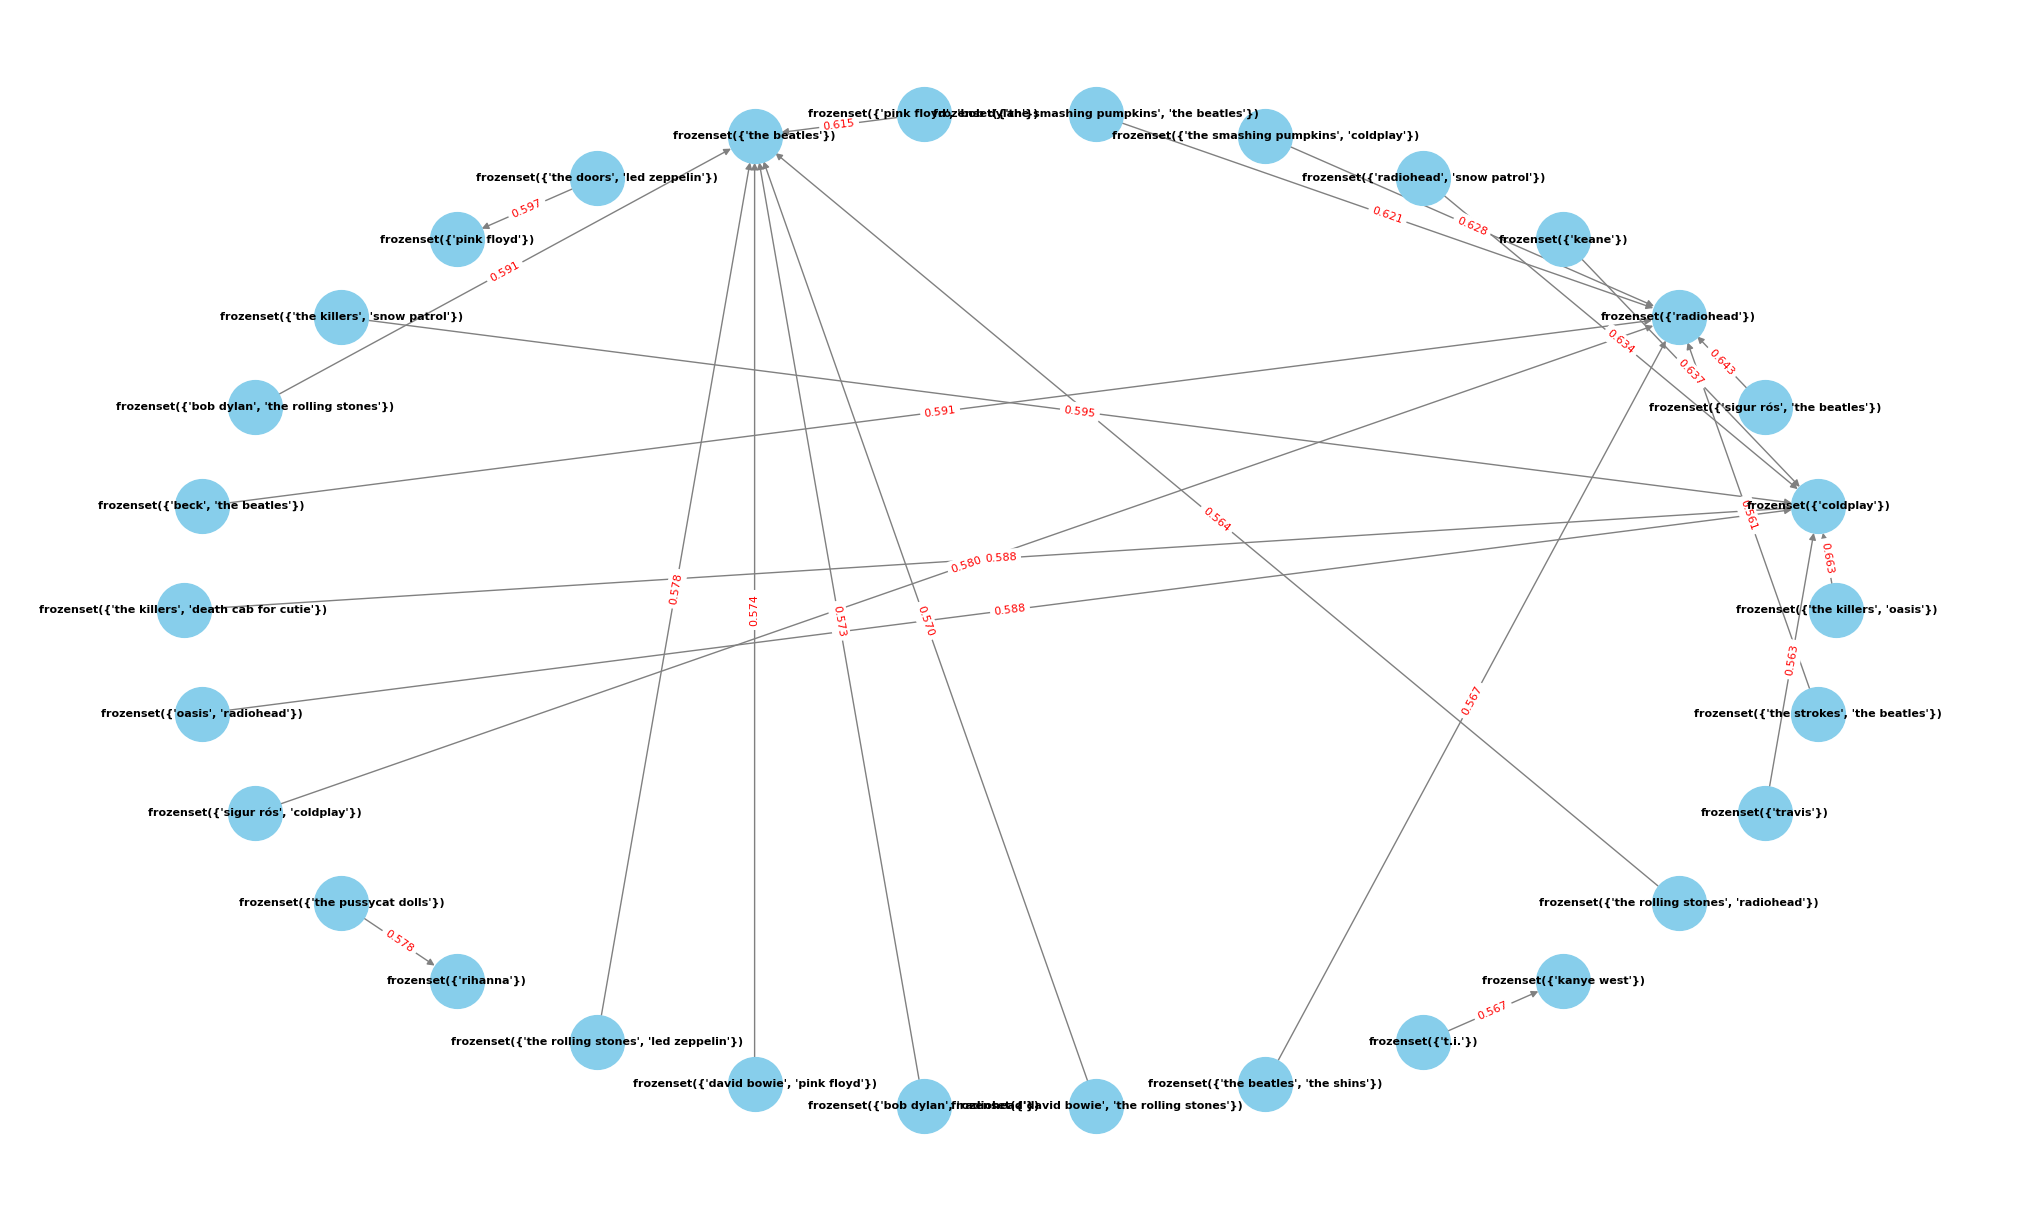

In [104]:
# Creamos un grafo con las reglas
G = nx.DiGraph()
for i, row in reglas.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])

# Visualizamos el grafo con layout circular
pos = nx.circular_layout(G)

# Redondeamos los valores de confianza a 3 decimales
edge_labels = {edge: f"{weight:.3f}" for edge, weight in nx.get_edge_attributes(G, 'weight').items()}

plt.figure(figsize=(20, 12))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1500, node_color="skyblue", font_size=8, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.show()